In [36]:
"""plotting libraray"""
import matplotlib.pyplot as plt
""" jupyter-dark-themes-plotting"""
from jupyterthemes import jtplot
jtplot.style()
""" mathematics library  """ 
from scipy.stats import multivariate_normal
import numpy as np

In [37]:
"""   Generate data library"""
from sklearn.datasets import make_blobs
from mylib.Gaussian_mixture_reduction import Gaussian_mixture_reduction
n_samples_ = 1000
k = 10
X, y_true = make_blobs(n_samples=n_samples_,
                       n_features = 2 , centers=k,
                       cluster_std=0.5,
                       random_state=0)

In [38]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]") \
                    .appName('Distributed Learning of Finite Gaussian Mixtures') \
                    .getOrCreate()
sc = spark.sparkContext
sqlContext = pyspark.SQLContext(sc)
data = sc.parallelize(X,4)

In [39]:
%%time
DLFGM = Gaussian_mixture_reduction().fit(data , k)

weighted average distribution  time: 2.5962717533111572
 majorization_minimization time: 7.182408094406128
CPU times: user 6.71 s, sys: 91.9 ms, total: 6.81 s
Wall time: 10 s


In [40]:
%%time
labels = DLFGM.predict(data)

CPU times: user 18.7 ms, sys: 8.37 ms, total: 27.1 ms
Wall time: 236 ms


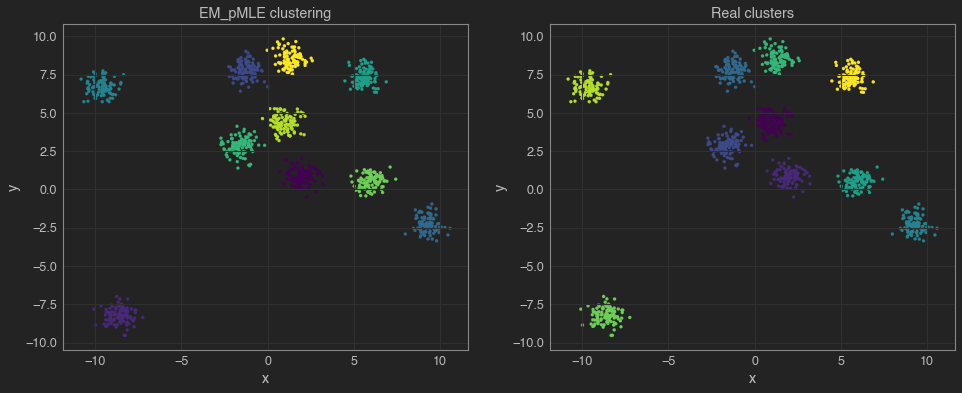

In [41]:
"""Plotting data """
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(X[:,0], X[:,1], s = 10  ,c = labels , cmap='viridis')
ax2.scatter(X[:,0], X[:,1], s = 10 , c = y_true, cmap='viridis')
ax1.set_title('EM_pMLE clustering')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_title('Real clusters')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

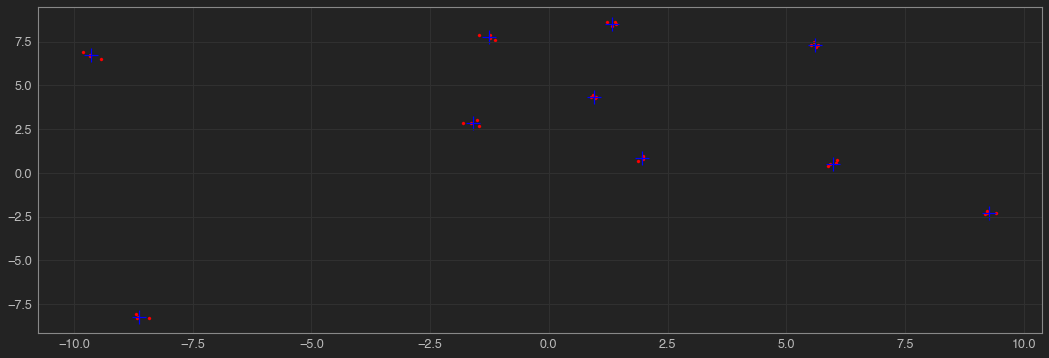

In [42]:
"""Means """
fig = plt.figure(figsize=(18,6))
plt.scatter(DLFGM.map_means[:,0],DLFGM.map_means[:,1], s=10, c="red")
plt.scatter(DLFGM.Means[:,0], DLFGM.Means[:,1] , s =200 , c ="blue" , marker='+')
plt.show()

Text(0.5, 0.92, 'Gaussian distribution ')

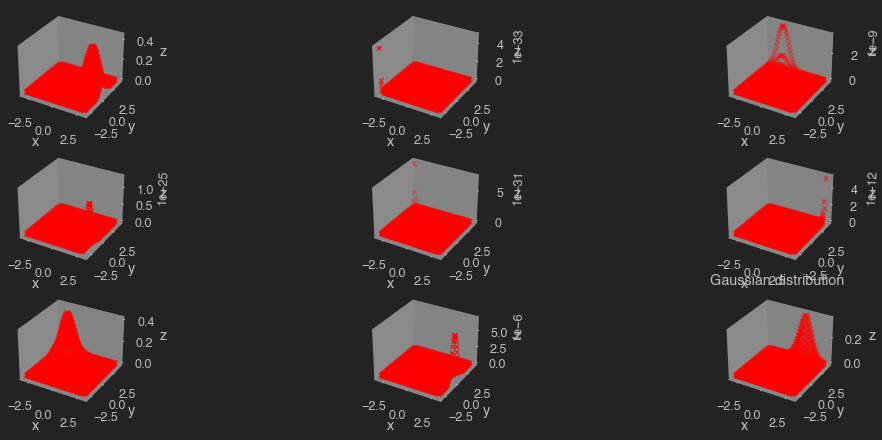

In [43]:
fig = plt.figure(figsize=(18,10))
for i in range(1,10) :
    ax = fig.add_subplot( int("".join(map(str, [4,3,i]))), projection='3d') 
    ########
    N    = 60
    X    = np.linspace(-3, 3, N)
    Y    = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)
    mu   = DLFGM.Means[i-1] ; covariance = DLFGM.Covars[i-1]
    pos  = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    Z = multivariate_normal.pdf(pos, mean=mu, cov=covariance)
    #######
    ax.scatter(X,Y,Z, marker="x", c="red")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(False)
ax.set_title("Gaussian distribution ")